In [47]:
import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv('alturas-pesos-train.csv')

In [49]:
df[:10]

,Genero,Peso,Altura
0,Mujer,60,160
1,Hombre,95,180
2,Hombre,75,170
3,Mujer,55,160
4,Mujer,55,150
5,Mujer,60,160
6,Hombre,80,175
7,Mujer,70,170
8,Mujer,55,155
9,Hombre,85,180


In [50]:
len(df)

8000

# Modelos en Machine Learning
- Generación
- Clasificación
- Regresión

# Tenemos 3 V.A: Género, Peso, Altura

## Género: V.A de Bernoulli

In [51]:
genero = df['Genero']
print(genero)

0        Mujer
1       Hombre
2       Hombre
3        Mujer
4        Mujer
         ...  
7995     Mujer
7996    Hombre
7997    Hombre
7998     Mujer
7999    Hombre
Name: Genero, Length: 8000, dtype: object


### Cual es el parámetro p?

In [52]:
p_hombre = (genero == 'Hombre').sum()/len(genero)
p_mujer = (genero == 'Mujer').sum()/len(genero)
print(p_hombre, p_mujer)

0.50025 0.49975


In [53]:
from matplotlib import pyplot as plt

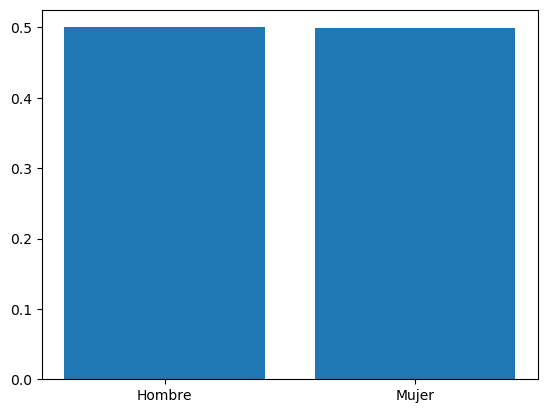

In [54]:
plt.bar(['Hombre', 'Mujer'], [0.50025, 0.49975])
plt.show()

Espacio muestral:

In [55]:
['Hombre', 'Mujer']

['Hombre', 'Mujer']

## Peso: V.A categórica

*Se la clasifica como categórica por que los valores posibles no son continuos, ya que van de 5 en 5*

In [56]:
from collections import Counter

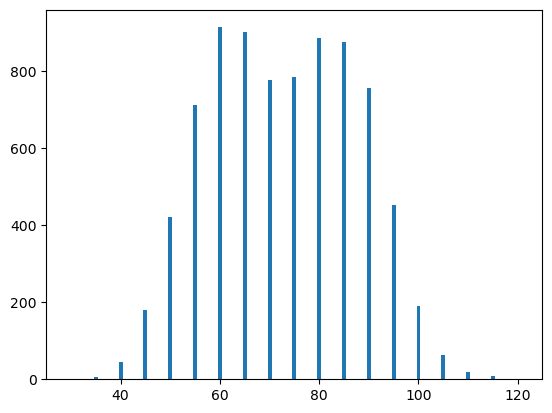

In [57]:
peso =  df['Peso']
peso_frecuencia = dict(Counter(peso)) # Usar Counter para armar un histograma
plt.bar(peso_frecuencia.keys(), peso_frecuencia.values()) # Grafico el histograma con barplot, no hist
plt.show()

## NOTA (JPV)

La distribución de la variable peso (y ocurre lo mismo con la altura) tiene una forma bi-modal. Esto es porque se observan los datos de hombres y mujeres en conjunto, donde cada uno tiene una distribución normal que se superpone con la otra.

In [58]:
print(peso_frecuencia)

{60: 914, 95: 452, 75: 786, 55: 712, 80: 887, 70: 777, 85: 877, 65: 903, 40: 45, 50: 421, 90: 757, 30: 2, 45: 180, 110: 20, 100: 189, 105: 62, 35: 7, 115: 8, 120: 1}


In [59]:
peso_frecuencia[65]

903

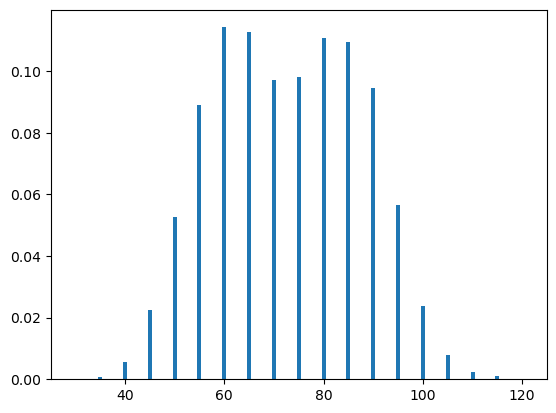

In [60]:
peso_prob = {pe:c/len(peso) for pe, c in peso_frecuencia.items()} # Normalización
plt.bar(peso_prob.keys(), peso_prob.values())
plt.show()

In [61]:
df['Peso']

0       60
1       95
2       75
3       55
4       55
        ..
7995    60
7996    85
7997    75
7998    65
7999    80
Name: Peso, Length: 8000, dtype: int64

Los gráficos de arriba podrían hacerse graficando directamente un histograma, aunque hay que jugar con el parámetro `bins` y `range` para que quede bien o similar.

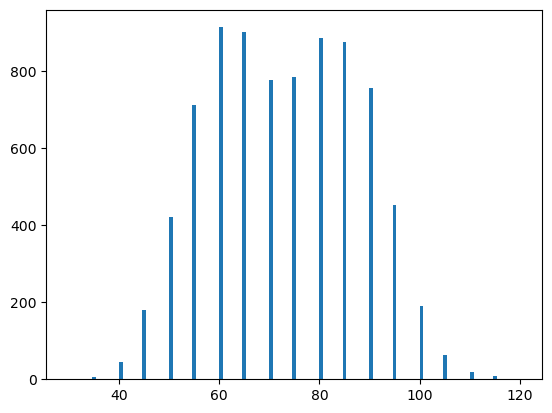

In [62]:
hist_peso = plt.hist(df['Peso'], bins=int((120-30/10)))
plt.show()

In [63]:
print(peso_prob)

{60: 0.11425, 95: 0.0565, 75: 0.09825, 55: 0.089, 80: 0.110875, 70: 0.097125, 85: 0.109625, 65: 0.112875, 40: 0.005625, 50: 0.052625, 90: 0.094625, 30: 0.00025, 45: 0.0225, 110: 0.0025, 100: 0.023625, 105: 0.00775, 35: 0.000875, 115: 0.001, 120: 0.000125}


In [64]:
peso_prob[65]

0.112875

Espacio Muestral:

In [65]:
np.sort(list(peso_prob.keys()))

array([ 30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,
        95, 100, 105, 110, 115, 120])

## Altura: V.A categórica

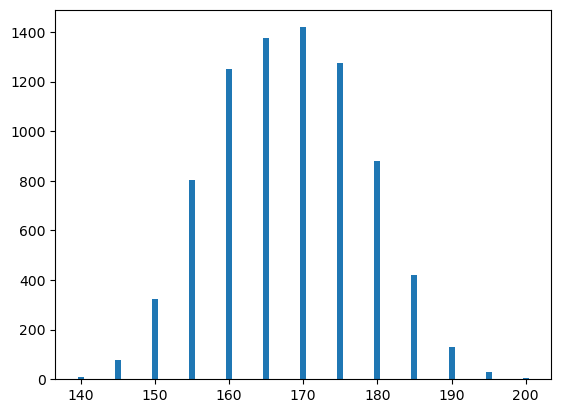

In [66]:
altura =  df['Altura']
altura_frecuencia = dict(Counter(altura))
plt.bar(altura_frecuencia.keys(), altura_frecuencia.values())
plt.show()

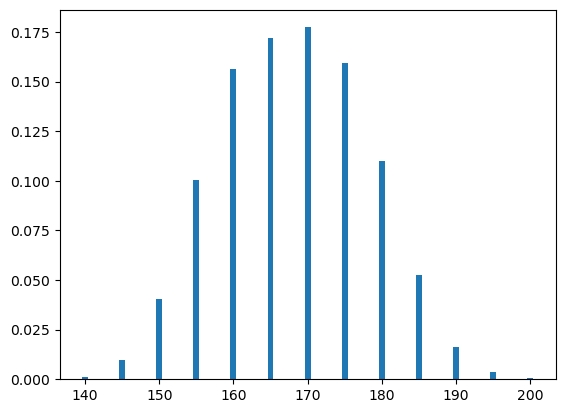

In [67]:
altura_prob = {al:c/len(altura) for al, c in altura_frecuencia.items()}
plt.bar(altura_prob.keys(), altura_prob.values())
plt.show()

In [68]:
altura_prob[170]

0.177375

Espacio muestral

In [69]:
np.sort(list(altura_frecuencia.keys()))

array([140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200])

# V.A Marginales
Cada V.A independiente de los valores que toman las otras

# Modelos generadores:

In [70]:
peso_gen = np.random.choice(list(peso_prob.keys()), size = 100, p = list(peso_prob.values()))
print(peso_gen)

[ 95  75  85  65  45  70  70  95  50  70  55  80  55  55  80 100  70  65
  65  60  65  75 105  90  65  90  70  75  85  95  75  70  60  80  50  45
  60  70  65  60  65  90  90  65  45  85  70  80  60  65  85  80  75 100
  60  90  60  75  65  80  65  75  65  75  60  95  60  80  55  75  65  60
 105  45  55  50  60  55  75  60  55  90  65  65  55  60  60  75  85  80
  60  75  50  50  55  65  60  40  65 100]


In [71]:
alt_gen = np.random.choice(list(altura_prob.keys()), size = 100, p = list(altura_prob.values()))
print(alt_gen)

[170 165 185 155 150 170 170 165 180 165 160 175 165 170 165 165 170 170
 160 180 165 170 160 165 185 170 175 175 160 170 155 175 175 165 155 170
 155 165 165 170 165 185 165 185 160 160 175 170 180 155 175 160 175 170
 170 175 180 160 155 165 160 175 160 160 160 180 180 170 170 180 175 155
 185 175 175 145 155 185 185 175 165 155 160 150 175 180 145 165 180 175
 180 155 180 160 180 180 180 165 170 150]


### Tiene sentido ahora armar conjunto de pesos, alturas generando de esta forma? Son independientes?

In [72]:
pesos_alts = np.array([list(peso_gen), list(alt_gen)]).T
pesos_alts[:10]

array([[ 95, 170],
       [ 75, 165],
       [ 85, 185],
       [ 65, 155],
       [ 45, 150],
       [ 70, 170],
       [ 70, 170],
       [ 95, 165],
       [ 50, 180],
       [ 70, 165]])

No, no tiene sentido porque ambas variables están correlacionadas. Una persona con altura de 150 y peso de 100 es muy poco probable.
Además, tampoco se está teniendo en cuenta el factor Sexo.

# Asi se generaron los pesos y alturas con baja precisión
No hace falta correr estas celdas

In [73]:
ap = pd.read_csv('alturas-pesos-mils-train.csv')

In [74]:
ap.head()

,Unnamed: 0,Genero,Peso,Altura
0,7620,Mujer,61.235,162.402
1,1837,Hombre,97.432,181.908
2,3311,Hombre,73.324,172.459
3,9478,Mujer,55.193,157.748
4,7805,Mujer,56.886,151.798


In [79]:
round(ap['Peso'][0]/5)*5

60

In [83]:
# Al dividir por 5, redondear al entero más cercano y volver a multiplicar por 5, lo que estoy haciendo es
# redondear a múltiplos de 5. astype(int) casetea cada valor de float a integer.
pesos_rounded = (np.round(ap['Peso'].values/5)*5).astype(int) 
alturas_rounded = (np.round(ap['Altura'].values/5)*5).astype(int)

In [103]:
alturas_rounded

array([160, 180, 170, ..., 170, 165, 170])

Copio el dataframe, y luego reemplazo las columnas peso y altura (la columna género se mantiene igual para todas las filas)

In [104]:
ap_rounded = ap.copy()

In [105]:
ap_rounded['Peso'] = pesos_rounded
ap_rounded['Altura'] = alturas_rounded

In [106]:
ap_final = ap_rounded[['Genero','Peso', 'Altura']].copy()

In [107]:
ap_final.to_csv('alturas-pesos-train.csv',index=False)